Mean Stability: 0.9265737934250408
Correlation Coefficient: 0.0698
p-value: 0.0000


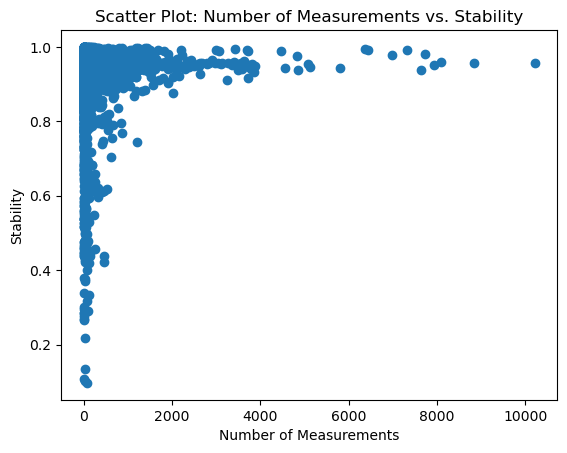

In [27]:
import sys
sys.path.append('../src')
import json
import pandas as pd
import matplotlib.pyplot as plt
from src.mapCreator import filter_data_by_geometry
from src.mainController import MainController
from src.MapTypes import MapTypes
from scipy.stats import pearsonr

# Load the JSON data from a file
with open('../data/db.json') as f:
    json_data = json.load(f)

bundeslaender = ['Baden-Württemberg', 'Bayern', 'Berlin', 'Brandenburg', 'Bremen', 'Hamburg', 'Hessen', 'Mecklenburg-Vorpommern', 'Niedersachsen', 'Nordrhein-Westfalen', 'Rheinland-Pfalz', 'Saarland','Sachsen-Anhalt', 'Sachsen', 'Schleswig-Holstein', 'Thüringen']

# Create a dictionary that maps each state to a unique ID
bundesland_to_id = {bundesland: i for i, bundesland in enumerate(bundeslaender)}


choosen_states = ["Baden-Württemberg", "Bayern"]
special_ids = None

# Get the IDs of the selected states
choosen_states_ids = [bundesland_to_id[bundesland] for bundesland in choosen_states]

# Filter data using GeoPandas
gdf = filter_data_by_geometry(json_data, choosen_states_ids, forexp=True)

# declare here to not throw errors later
mainController = MainController()
mainController.setData(gdf, MapTypes.Gauss, special_ids)

#print(mainController.dto.gdf.columns)

filtered_data = mainController.dto.gdf[mainController.dto.gdf['all_measurements'].notnull() & (mainController.dto.gdf['all_measurements'] != 0)]

mean_stability = filtered_data['all_stability'].mean()

print("Mean Stability:", mean_stability)

# Step 1: Correlation Analysis
correlation_coefficient, p_value = pearsonr(filtered_data['all_measurements'], filtered_data['all_stability'])
print(f'Correlation Coefficient: {correlation_coefficient:.4f}')
print(f'p-value: {p_value:.4f}')

# Step 2: Scatter Plot
plt.scatter(filtered_data['all_measurements'], filtered_data['all_stability'])
plt.xlabel('Number of Measurements')
plt.ylabel('Stability')
plt.title('Scatter Plot: Number of Measurements vs. Stability')
plt.show()



In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Step 3: Simple Linear Regression
X = filtered_data[['all_measurements']]
y = filtered_data['all_stability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print the coefficients
print(f'Intercept: {model.intercept_:.4f}')
print(f'Coefficient (slope): {model.coef_[0]:.4f}')

Intercept: 0.9241
Coefficient (slope): 0.0000


In [29]:
import statsmodels.api as sm

# Add a constant term to the independent variable (Number_of_Measurements)
X = sm.add_constant(filtered_data['all_measurements'])

# Dependent variable
y = filtered_data['all_stability']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Display the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          all_stability   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     20.97
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           4.81e-06
Time:                        22:10:03   Log-Likelihood:                 4156.3
No. Observations:                4289   AIC:                            -8309.
Df Residuals:                    4287   BIC:                            -8296.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.9244      0.001  